# Data exploration

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

* ### density

In [ ]:
def plot_density(data, title):
    all_values = data['sentiment values']
    pp_value = data[data['sentiment'] == 5]['sentiment values']
    p_values = data[data['sentiment'] == 4]['sentiment values']
    nuetral_values = data[data['sentiment'] == 3]['sentiment values']
    n_values = data[data['sentiment'] == 2]['sentiment values']
    nn_values = data[data['sentiment'] == 1]['sentiment values']

    fig = plt.figure(figsize=(16, 6))

    ax_1 = fig.add_subplot(121)
    sns.distplot(all_values, kde=True, hist=True, label='all', color='C0')
    ax_1.legend()

    ax_2 = fig.add_subplot(122)
    sns.distplot(pp_value, kde=True, hist=True, label='very positive', color='C1')
    sns.distplot(p_values, kde=True, hist=True, label='positive', color='C2')
    sns.distplot(nuetral_values, kde=True, hist=True, label='neutral', color='C3')
    sns.distplot(n_values, kde=True, hist=True, label='negative', color='C4')
    sns.distplot(nn_values, kde=True, hist=True, label='very negative', color='C5')
    ax_2.legend()
    
    plt.suptitle(title,fontsize=20)
    plt.show()

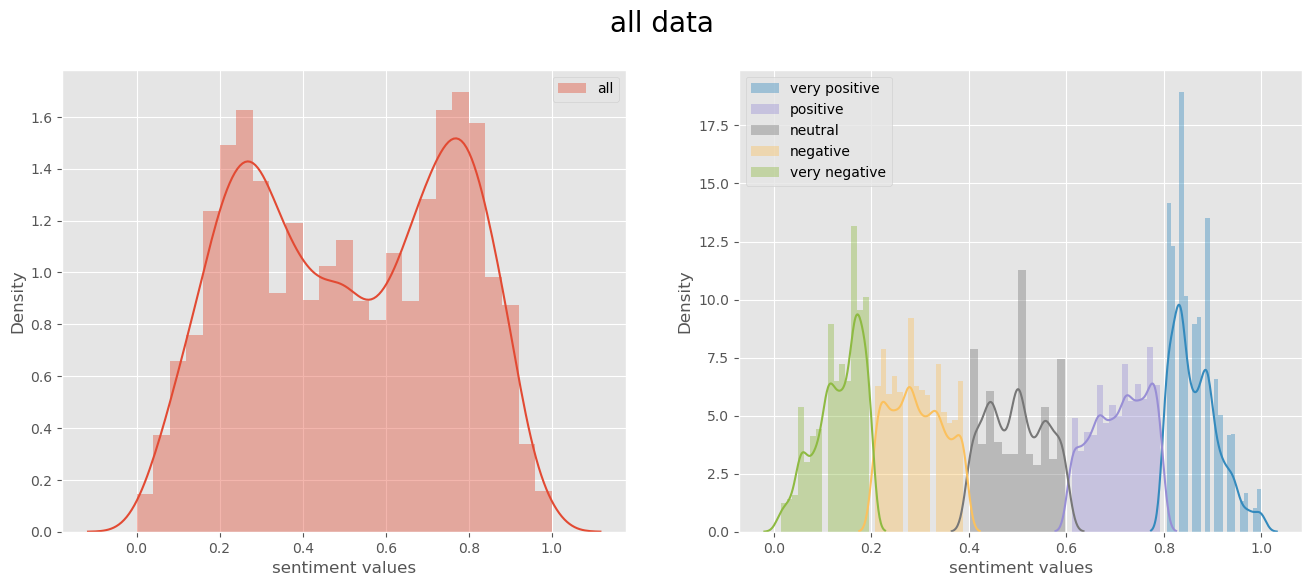

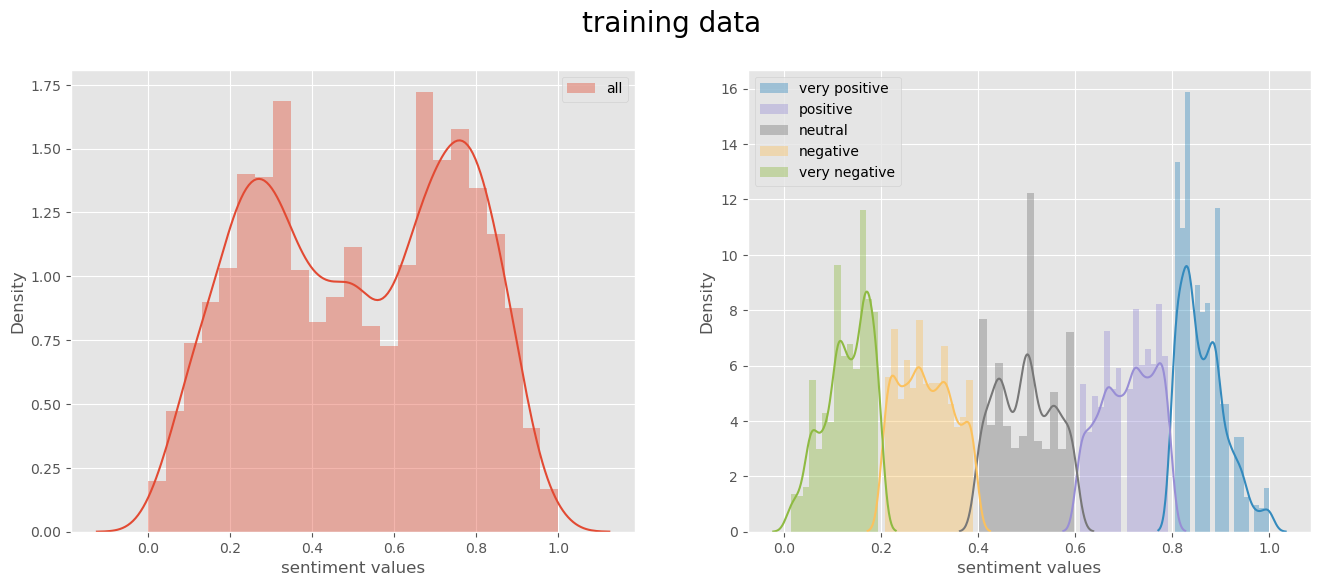

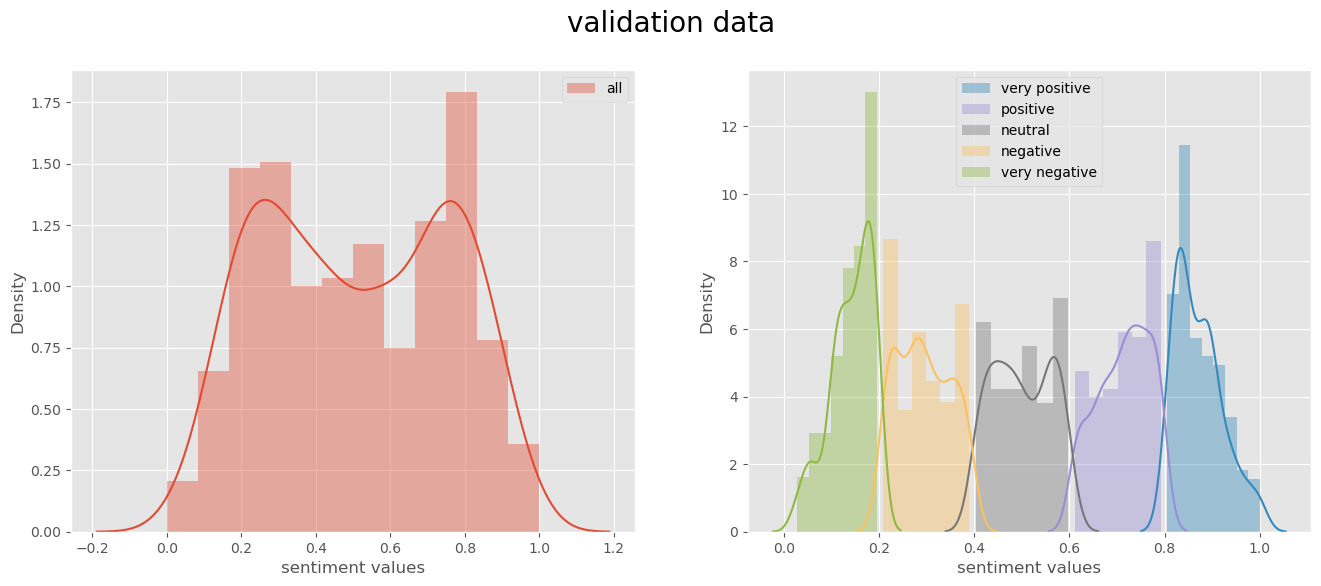

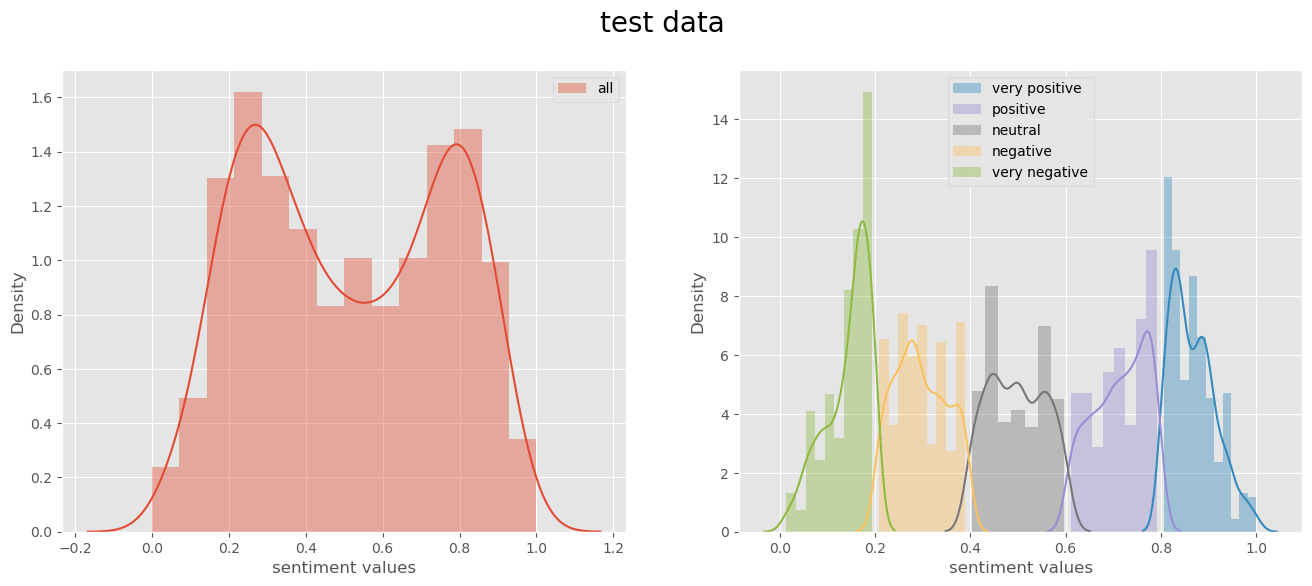

In [ ]:
plot_density(dataset, 'all data')
plot_density(dataset[dataset['splitset_label']==1], 'training data')
plot_density(dataset[dataset['splitset_label']==3], 'validation data')
plot_density(dataset[dataset['splitset_label']==2], 'test data')


* ### WordCloud

Text(0.5, 1.0, 'all')

Text(0.5, 1.0, 'very positive')

Text(0.5, 1.0, 'positive')

Text(0.5, 1.0, 'nuetral')

Text(0.5, 1.0, 'negative')

Text(0.5, 1.0, 'very negative')

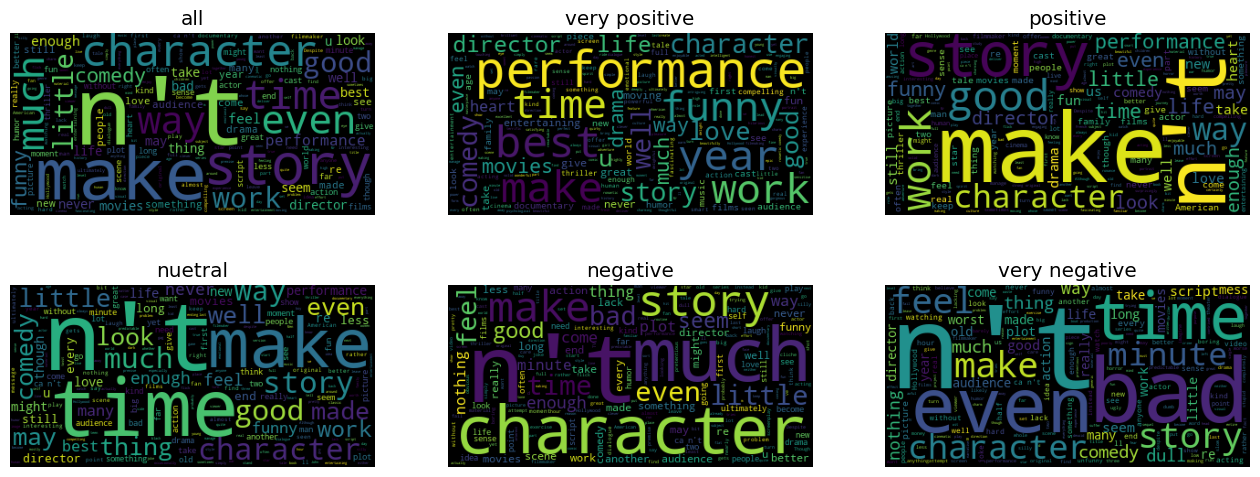

In [ ]:
from wordcloud import WordCloud, STOPWORDS

all_sentences = ''.join(dataset['phrase'].tolist())
pp_sentences = ''.join(dataset[dataset['sentiment'] == 5]['phrase'].tolist())
p_sentences = ''.join(dataset[dataset['sentiment'] == 4]['phrase'].tolist())
nuetral_sentences = ''.join(dataset[dataset['sentiment'] == 3]['phrase'].tolist())
n_sentences = ''.join(dataset[dataset['sentiment'] == 2]['phrase'].tolist())
nn_sentences = ''.join(dataset[dataset['sentiment'] == 1]['phrase'].tolist())

docs = [all_sentences, pp_sentences, p_sentences, nuetral_sentences, n_sentences, nn_sentences]
lables = ['all', 'very positive', 'positive', 'nuetral', 'negative', 'very negative']

stop_words = ['film', 'movie', 's', 'one', 'will'] + list(STOPWORDS)

fig = plt.figure(figsize=(16, 6))

for idx, sentences in enumerate(docs):
    ax = fig.add_subplot(2,3,idx+1)
    wc = WordCloud(max_words=200, stopwords = stop_words)
    ax.imshow(wc.generate(sentences))
    ax.set_axis_off()
    ax.set_title(lables[idx])
plt.show()

* ### Decomposition

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5000)
pca.fit(train_data)
train_data_de = pca.transform(train_data)
pca_ratio = pca.explained_variance_ratio_

PCA(n_components=5000)

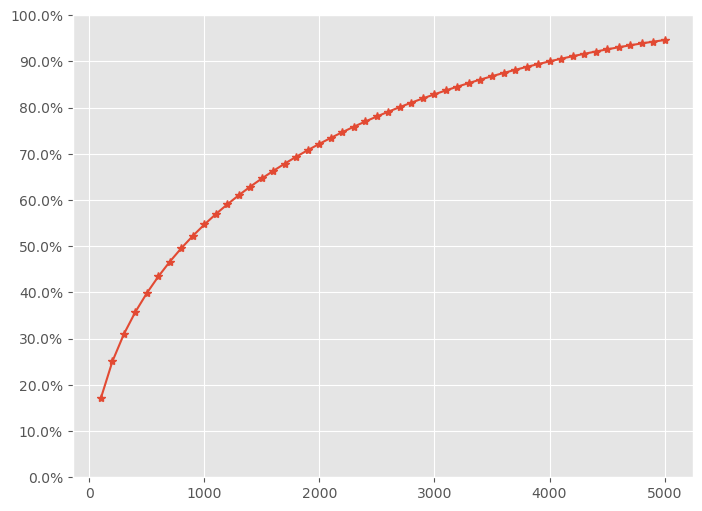

In [ ]:
component_ratio = [np.sum(pca_ratio[0:(i+1)*100]) for i in range(50)]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
_ = ax.set_ylim(0, 1)
_ = ax.set_yticks(np.linspace(0, 1, 11))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.plot([(i+1)*100 for i in range(50)], component_ratio, marker='*')
plt.show()